#  Simple 2layer

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [9]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
import numpy as np
data = np.random.random((1000, 100))
labels = np.array([[int(np.sum(i>0.5) > 50)] for i in data])

test_data = np.random.random((100, 100))
test_labels = np.array([[int(np.sum(i>0.5) > 50)] for i in test_data])

In [54]:
h = model.fit(data, labels, epochs=50, batch_size=32,
             validation_data=(test_data,test_labels))

Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 0s 70us/step - loss: 0.8876 - acc: 0.6130 - val_loss: 0.8456 - val_acc: 0.6400
Epoch 2/50
1000/1000 [==============================] - 0s 49us/step - loss: 0.7974 - acc: 0.6300 - val_loss: 0.9255 - val_acc: 0.5500
Epoch 3/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.7603 - acc: 0.6400 - val_loss: 0.8471 - val_acc: 0.6100
Epoch 4/50
1000/1000 [==============================] - 0s 53us/step - loss: 0.7125 - acc: 0.6580 - val_loss: 0.9479 - val_acc: 0.5900
Epoch 5/50
1000/1000 [==============================] - 0s 53us/step - loss: 0.6928 - acc: 0.6620 - val_loss: 0.8152 - val_acc: 0.6300
Epoch 6/50
1000/1000 [==============================] - 0s 75us/step - loss: 0.6625 - acc: 0.6790 - val_loss: 0.8515 - val_acc: 0.6300
Epoch 7/50
1000/1000 [==============================] - 0s 82us/step - loss: 0.6336 - acc: 0.6970 - val_loss: 0.9992 - val_acc: 0.5800
Epoch 8/

Text(0.5,1,'Loss Curves')

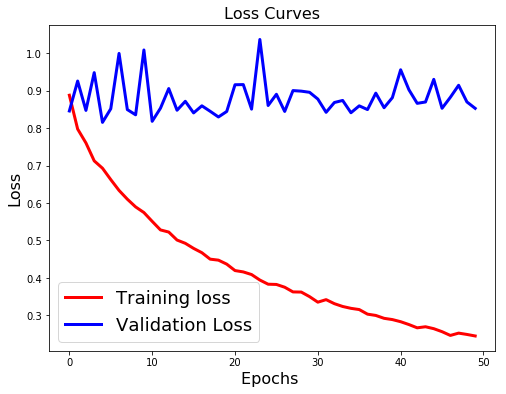

In [55]:
plt.figure(figsize=[8,6])
plt.plot(h.history['loss'],'r',linewidth=3.0)
plt.plot(h.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [39]:
labels

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

# Cifar10 CNN

## Setup

In [67]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [68]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

## Data

In [58]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 50s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[9]


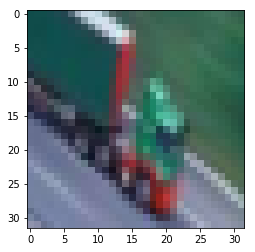

In [64]:
i = 50
plt.imshow(x_train[i])
print(y_train[i])

In [66]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model

In [69]:
model = Sequential()

# 2 convolution layers
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2 dense layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



In [70]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Data Preprocessing 

In [71]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Fit

In [72]:
if not data_augmentation:
    print('Not using data augmentation.')
    hist = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    hist = model.fit_generator(datagen.flow(x_train, y_train,
                                             batch_size=batch_size),
                                epochs=epochs,
                                validation_data=(x_test, y_test),
                                workers=4)

Using real-time data augmentation.
Epoch 1/100
 516/1563 [========>.....................] - ETA: 4:20 - loss: 1.9471 - acc: 0.2908

KeyboardInterrupt: 

# Plot

Text(0.5,1,'Loss Curves')

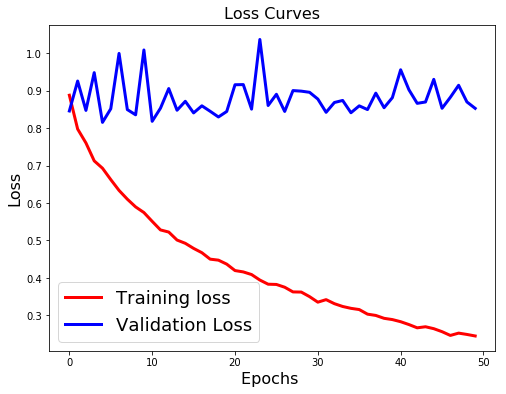

In [73]:
plt.figure(figsize=[8,6])
plt.plot(h.history['loss'],'r',linewidth=3.0)
plt.plot(h.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## Save

In [ ]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])